In [ ]:
# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Display basic information
print("=== DATASET OVERVIEW ===")
print(f"Dataset Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst 5 rows:")
print(df.head())

=== DATASET OVERVIEW ===
Dataset Shape: (891, 12)
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
# Survival by Gender
gender_survival = df_clean.groupby('Sex', observed=False)['Survived'].apply(lambda x: pd.Series({'mean': x.astype(int).mean(), 'count': x.count()}))
gender_survival['mean'] = gender_survival.loc[:, 'mean'] * 100
print("Survival by Gender (%):")
print(gender_survival)

Survival by Gender (%):
Sex          
female  mean                                              0.742038
        count                                                314.0
male    mean                                              0.188908
        count                                                577.0
mean             Sex
female    74.203822
male      18.890815
Na...
Name: Survived, dtype: object


In [ ]:
# Combined analysis: Survival by Class and Gender
combined_survival = df_clean.groupby(['Pclass', 'Sex'], observed=False)['Survived'].apply(lambda x: x.astype(int).mean()).unstack() * 100
print("\nSurvival by Class and Gender (%):")
print(combined_survival)


Survival by Class and Gender (%):
Sex        female       male
Pclass                      
1       96.808511  36.885246
2       92.105263  15.740741
3       50.000000  13.544669


In [ ]:
# Survival by Embarked Port
embarked_survival = df_clean.groupby('Embarked', observed=False)['Survived'].apply(lambda x: pd.Series({'mean': x.astype(int).mean(), 'count': x.count()}))
embarked_survival['mean'] = embarked_survival.loc[:, 'mean'] * 100
print("\nSurvival by Embarked Port (%):")
print(embarked_survival)


Survival by Embarked Port (%):
Embarked       
C         mean                                              0.553571
          count                                                168.0
Q         mean                                               0.38961
          count                                                 77.0
S         mean                                              0.339009
          count                                                646.0
mean               Embarked
C    55.357143
Q    38.961039
S    33...
Name: Survived, dtype: object


In [ ]:
# Survival by Passenger Class
class_survival = df_clean.groupby('Pclass', observed=False)['Survived'].apply(lambda x: pd.Series({'mean': x.astype(int).mean(), 'count': x.count()}))
class_survival['mean'] = class_survival.loc[:, 'mean'] * 100
print("\nSurvival by Passenger Class (%):")
print(class_survival)


Survival by Passenger Class (%):
Pclass       
1       mean                                               0.62963
        count                                                216.0
2       mean                                              0.472826
        count                                                184.0
3       mean                                              0.242363
        count                                                491.0
mean             Pclass
1    62.962963
2    47.282609
3    24.2...
Name: Survived, dtype: object


In [ ]:
print("=== GROUP-BASED INSIGHTS ===")

=== GROUP-BASED INSIGHTS ===


In [ ]:
# Categorical columns statistics
print("\nCategorical Columns Statistics:")
print(f"Survival Rate: {df_clean['Survived'].astype(int).mean():.2%}")
print(f"Passenger Class Distribution:\n{df_clean['Pclass'].value_counts()}")
print(f"Gender Distribution:\n{df_clean['Sex'].value_counts()}")
print(f"Embarked Port Distribution:\n{df_clean['Embarked'].value_counts()}")


Categorical Columns Statistics:
Survival Rate: 38.38%
Passenger Class Distribution:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Gender Distribution:
Sex
male      577
female    314
Name: count, dtype: int64
Embarked Port Distribution:
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [ ]:
# Numerical columns statistics
print("\nNumerical Columns Statistics:")
print(df_clean[['Age', 'SibSp', 'Parch', 'Fare']].describe())


Numerical Columns Statistics:
              Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000
mean    29.361582    0.523008    0.381594   32.204208
std     13.019697    1.102743    0.806057   49.693429
min      0.420000    0.000000    0.000000    0.000000
25%     22.000000    0.000000    0.000000    7.910400
50%     28.000000    0.000000    0.000000   14.454200
75%     35.000000    1.000000    0.000000   31.000000
max     80.000000    8.000000    6.000000  512.329200


In [ ]:
print("=== SUMMARY STATISTICS ===")

=== SUMMARY STATISTICS ===


In [ ]:
print(f"\nMissing values after cleaning: {df_clean.isnull().sum().sum()}")


Missing values after cleaning: 0


In [ ]:
# Convert data types if needed
df_clean['Survived'] = df_clean['Survived'].astype('category')
df_clean['Pclass'] = df_clean['Pclass'].astype('category')
df_clean['Sex'] = df_clean['Sex'].astype('category')
df_clean['Embarked'] = df_clean['Embarked'].astype('category')

In [ ]:
# Cabin has too many missing values - we'll create a flag instead of dropping
df_clean['Has_Cabin'] = df_clean['Cabin'].notna().astype(int)
df_clean.drop('Cabin', axis=1, inplace=True)
print("Created 'Has_Cabin' flag and dropped original Cabin column")

Created 'Has_Cabin' flag and dropped original Cabin column


In [ ]:
# Handle Embarked missing values (fill with mode)
embarked_mode = df_clean['Embarked'].mode()[0]
df_clean['Embarked'] = df_clean['Embarked'].fillna(embarked_mode)
print(f"Filled {df_clean['Embarked'].isnull().sum()} missing Embarked values with mode: {embarked_mode}")

Filled 0 missing Embarked values with mode: S


In [ ]:
# Handle Age missing values (fill with median)
age_median = df_clean['Age'].median()
df_clean['Age'] = df_clean['Age'].fillna(age_median)
print(f"Filled {df_clean['Age'].isnull().sum()} missing Age values with median: {age_median}")

Filled 0 missing Age values with median: 28.0


In [ ]:
# Create a copy for cleaning
df_clean = df.copy()

In [ ]:
print("=== DATA CLEANING ===")

=== DATA CLEANING ===


In [ ]:
print("\nMissing Values Analysis:")
print(missing_info[missing_info['Missing Count'] > 0])


Missing Values Analysis:
          Missing Count  Missing Percentage
Age                 177           19.865320
Cabin               687           77.104377
Embarked              2            0.224467


In [ ]:
missing_info = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})

In [ ]:
# Most significant correlations
# Include 'Survived' as integer for correlation calculation
numeric_cols_for_corr = df_clean.select_dtypes(include=[np.number]).columns.tolist()
if 'Survived' not in numeric_cols_for_corr:
    numeric_cols_for_corr.append('Survived')

corr_df = df_clean[numeric_cols_for_corr].copy()
corr_df['Survived'] = corr_df['Survived'].astype(int)


corr_with_survival = corr_df.corr()['Survived'].sort_values(ascending=False)
print("\n5. Correlation with Survival:")
for feature, corr in corr_with_survival.items():
    if feature != 'Survived':
        print(f"   {feature}: {corr:.3f}")


5. Correlation with Survival:
   Has_Cabin: 0.317
   Fare: 0.257
   Parch: 0.082
   PassengerId: -0.005
   SibSp: -0.035
   Age: -0.065


In [ ]:
print("3. Class 1 Survival: {:.1%} vs Class 3: {:.1%}".format(
    df_clean[df_clean['Pclass']==1]['Survived'].astype(int).mean(),
    df_clean[df_clean['Pclass']==3]['Survived'].astype(int).mean()
))

3. Class 1 Survival: 63.0% vs Class 3: 24.2%


In [ ]:
# Top insights
print("1. Overall Survival Rate: {:.1%}".format(df_clean['Survived'].astype(int).mean()))
print("2. Female Survival Rate: {:.1%} vs Male: {:.1%}".format(
    df_clean[df_clean['Sex']=='female']['Survived'].astype(int).mean(),
    df_clean[df_clean['Sex']=='male']['Survived'].astype(int).mean()
))

1. Overall Survival Rate: 38.4%
2. Female Survival Rate: 74.2% vs Male: 18.9%


In [ ]:
print("=== KEY INSIGHTS SUMMARY ===")

=== KEY INSIGHTS SUMMARY ===


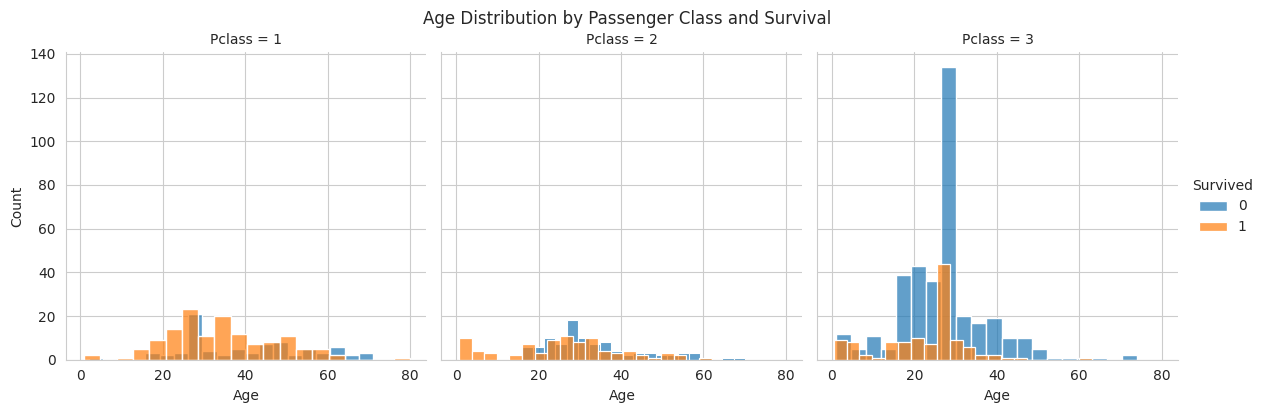

In [ ]:
# Facet grid: Age distribution by class and survival
g = sns.FacetGrid(df_clean, col='Pclass', hue='Survived', height=4)
g.map(sns.histplot, 'Age', alpha=0.7, bins=20)
g.add_legend()
plt.suptitle('Age Distribution by Passenger Class and Survival', y=1.02)
plt.show()

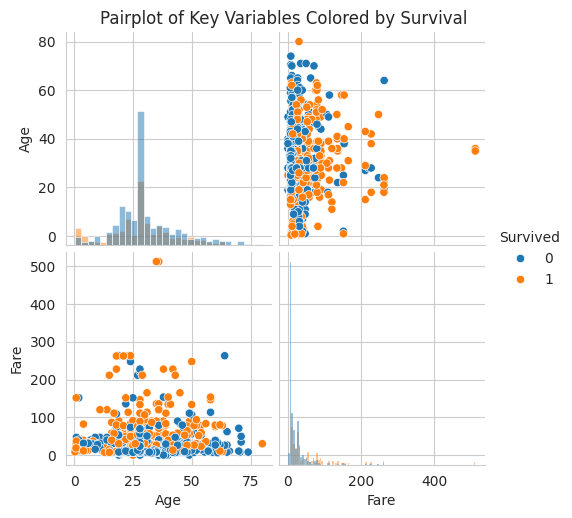

In [ ]:
# Pairplot for numerical variables
sns.pairplot(df_clean[['Survived', 'Age', 'Fare', 'Pclass', 'Sex']],
             hue='Survived', diag_kind='hist')
plt.suptitle('Pairplot of Key Variables Colored by Survival', y=1.02)
plt.show()

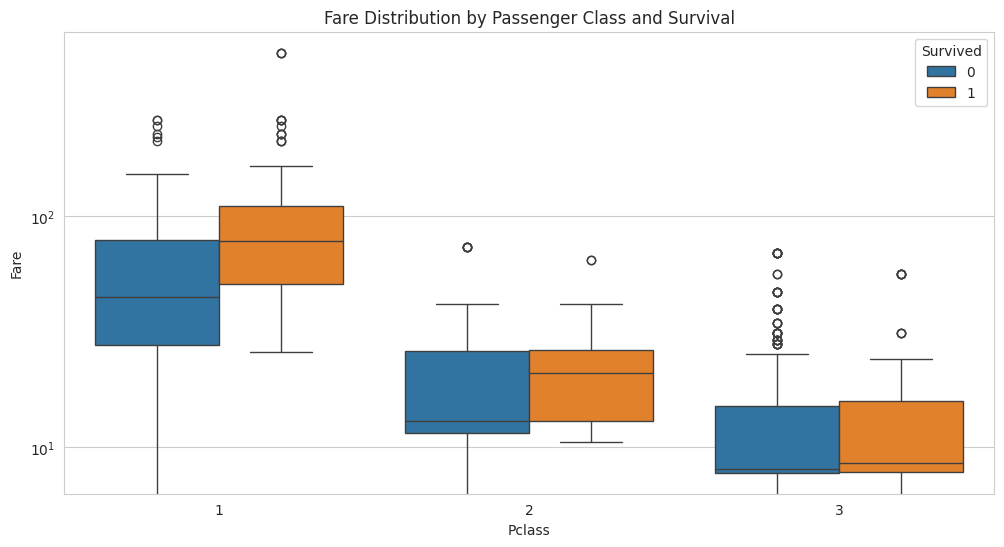

In [ ]:
# Fare distribution by survival and class
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df_clean)
plt.title('Fare Distribution by Passenger Class and Survival')
plt.yscale('log')  # Using log scale for better visualization
plt.show()

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Age Distribution by Survival Status (Box Plot)')

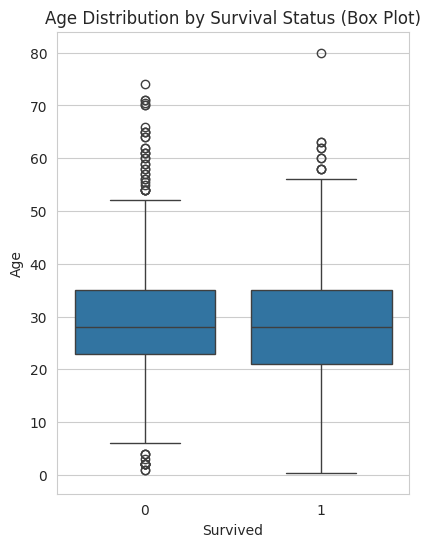

In [ ]:
plt.subplot(1, 2, 2)
sns.boxplot(x='Survived', y='Age', data=df_clean)
plt.title('Age Distribution by Survival Status (Box Plot)')

Text(0.5, 1.0, 'Age Distribution by Survival Status')

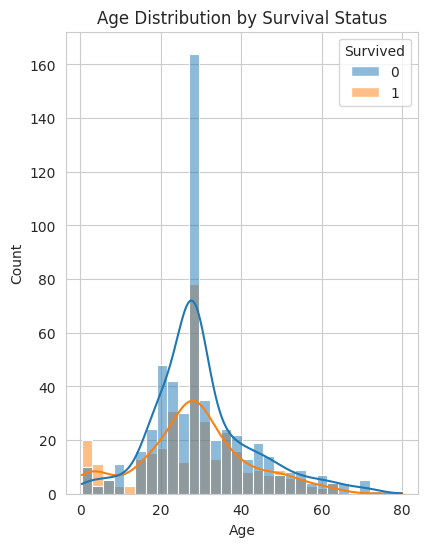

In [ ]:
plt.subplot(1, 2, 1)
sns.histplot(data=df_clean, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Age Distribution by Survival Status')

In [ ]:
# Age distribution by survival
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

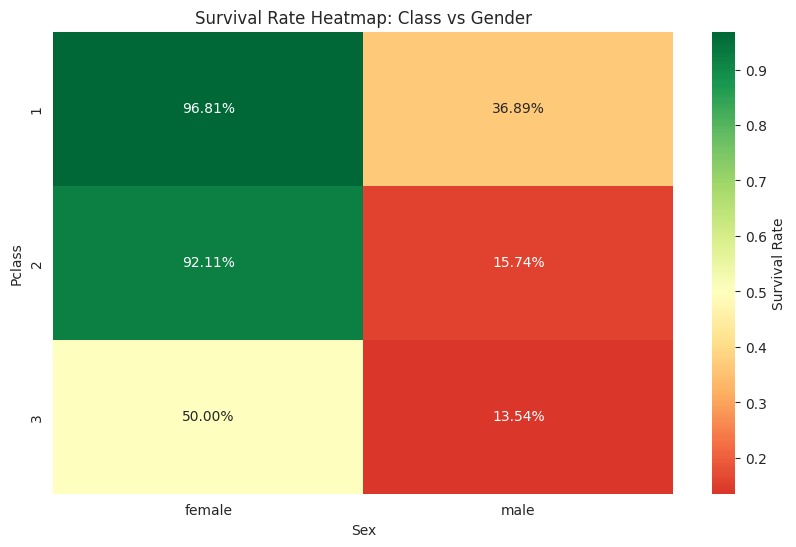

In [ ]:
sns.heatmap(pivot_table, annot=True, fmt='.2%', cmap='RdYlGn',
            center=0.5, cbar_kws={'label': 'Survival Rate'})
plt.title('Survival Rate Heatmap: Class vs Gender')
plt.show()

In [ ]:
# Survival rate heatmap by Class and Gender
plt.figure(figsize=(8, 6))
pivot_table = df_clean.pivot_table(values='Survived',
                                  index='Pclass',
                                  columns='Sex',
                                  aggfunc=lambda x: x.astype(int).mean(),
                                  observed=False)

<Figure size 800x600 with 0 Axes>

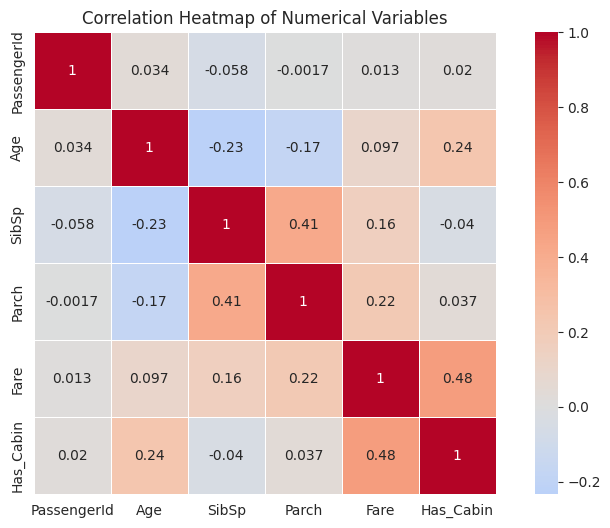

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_df = df_clean.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

<Figure size 1000x800 with 0 Axes>

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

Text(0, 0.5, 'Survival Rate')

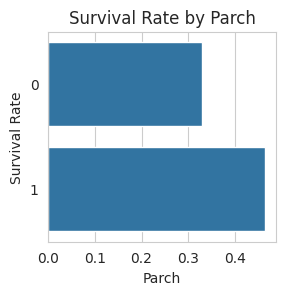

In [ ]:
# Survival rate by number of parents/children
plt.subplot(2, 3, 6)
sns.barplot(x='Parch', y='Survived', data=df_clean, errorbar=None)
plt.title('Survival Rate by Parch')
plt.ylabel('Survival Rate')

Text(0, 0.5, 'Survival Rate')

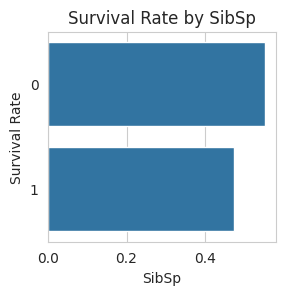

In [ ]:
# Survival rate by number of siblings/spouses
plt.subplot(2, 3, 5)
sns.barplot(x='SibSp', y='Survived', data=df_clean, errorbar=None)
plt.title('Survival Rate by SibSp')
plt.ylabel('Survival Rate')

Text(0, 0.5, 'Survival Rate')

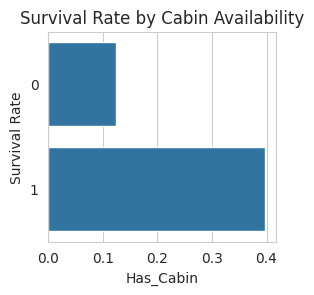

In [ ]:
plt.subplot(2, 3, 4)
sns.barplot(x='Has_Cabin', y='Survived', data=df_clean, errorbar=None)
plt.title('Survival Rate by Cabin Availability')
plt.ylabel('Survival Rate')

Text(0, 0.5, 'Survival Rate')

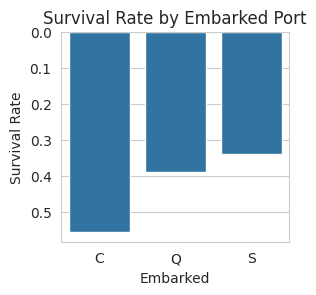

In [ ]:
plt.subplot(2, 3, 3)
sns.barplot(x='Embarked', y='Survived', data=df_clean, errorbar=None)
plt.title('Survival Rate by Embarked Port')
plt.ylabel('Survival Rate')

Text(0, 0.5, 'Survival Rate')

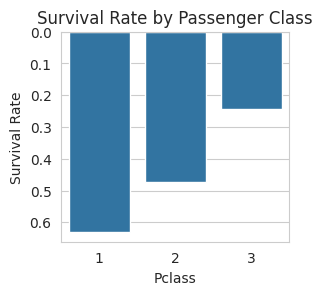

In [ ]:
plt.subplot(2, 3, 2)
sns.barplot(x='Pclass', y='Survived', data=df_clean, errorbar=None)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')

Text(0, 0.5, 'Survival Rate')

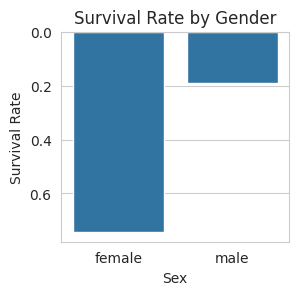

In [ ]:
plt.subplot(2, 3, 1)
sns.barplot(x='Sex', y='Survived', data=df_clean, errorbar=None)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')

In [ ]:
# Survival rates bar plots
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Survival by Cabin Availability')

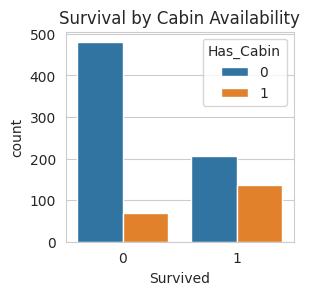

In [ ]:
# Survival by Cabin availability
plt.subplot(2, 3, 5)
sns.countplot(x='Survived', hue='Has_Cabin', data=df_clean)
plt.title('Survival by Cabin Availability')

Text(0.5, 1.0, 'Survival by Embarked Port')

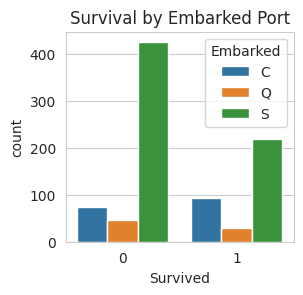

In [ ]:
# Survival by Embarked
plt.subplot(2, 3, 4)
sns.countplot(x='Survived', hue='Embarked', data=df_clean)
plt.title('Survival by Embarked Port')

Text(0.5, 1.0, 'Survival by Passenger Class')

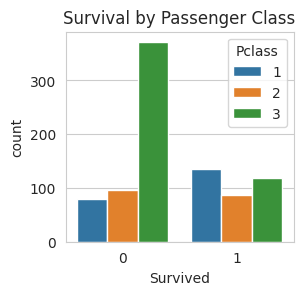

In [ ]:
# Survival by Class
plt.subplot(2, 3, 3)
sns.countplot(x='Survived', hue='Pclass', data=df_clean)
plt.title('Survival by Passenger Class')

Text(0.5, 1.0, 'Survival by Gender')

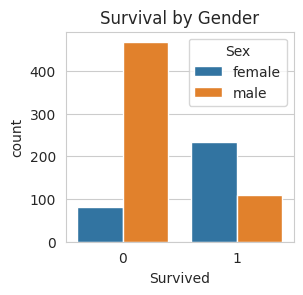

In [ ]:
# Survival by Gender
plt.subplot(2, 3, 2)
sns.countplot(x='Survived', hue='Sex', data=df_clean)
plt.title('Survival by Gender')

Text(0.5, 0, 'Survived (0=No, 1=Yes)')

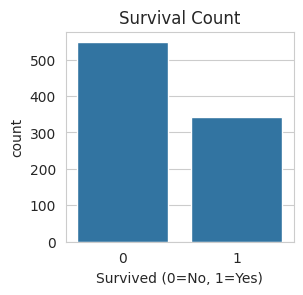

In [ ]:
plt.subplot(2, 3, 1)
sns.countplot(x='Survived', data=df_clean)
plt.title('Survival Count')
plt.xlabel('Survived (0=No, 1=Yes)')

In [ ]:
# Survival count plot
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Missing values analysis
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

In [ ]:
# Data types information
print("\nData Types:")
print(df.dtypes)


Data Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [ ]:
print("=== DATA TYPES AND MISSING VALUES ===")

=== DATA TYPES AND MISSING VALUES ===
